In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [4]:
!ls /content


sample_data


In [5]:
!ls /content


sample_data


In [10]:
!ls /content


sample_data


In [11]:
!find / -name "Flight_Sample_2022-09-01.csv" 2>/dev/null


In [12]:
!find / -name "country_vaccinations.csv" 2>/dev/null
!find / -name "Countries_usefulFeatures.csv.xls" 2>/dev/null


/country_vaccinations.csv
/content/sample_data/country_vaccinations.csv
/content/sample_data/Countries_usefulFeatures.csv.xls
/Countries_usefulFeatures.csv.xls


In [19]:
import os

# List all files in /content and /content/sample_data
print("📂 /content:")
print(os.listdir('/content'))

print("\n📂 /content/sample_data:")
print(os.listdir('/content/sample_data'))


📂 /content:
['.config', 'sample_data']

📂 /content/sample_data:
['README.md', 'country_vaccinations.csv', '.ipynb_checkpoints', 'Countries_usefulFeatures.csv.xls', 'flight_sample_2022-09-01.csv']


In [22]:
tourism_df = pd.read_csv('/content/sample_data/Countries_usefulFeatures.csv.xls')


In [23]:
import pandas as pd

# Load datasets
flight_df = pd.read_csv('/content/sample_data/flight_sample_2022-09-01.csv')
covid_df = pd.read_csv('/content/sample_data/country_vaccinations.csv')
tourism_df = pd.read_csv('/content/sample_data/Countries_usefulFeatures.csv.xls')  # Treated as CSV

# Confirmation
print("✅ All files loaded successfully!\n")
print("📦 Flight Data:", flight_df.shape)
print("💉 Vaccination Data:", covid_df.shape)
print("🌍 Tourism Data:", tourism_df.shape)


✅ All files loaded successfully!

📦 Flight Data: (115725, 9)
💉 Vaccination Data: (86512, 15)
🌍 Tourism Data: (184, 11)


In [24]:
# Exploring Flight Data
print("📦 Flight Data Overview:")
print(flight_df.info())
print(flight_df.isnull().sum())
print(flight_df.head(), '\n')

# Exploring Vaccination Data
print("💉 Vaccination Data Overview:")
print(covid_df.info())
print(covid_df.isnull().sum())
print(covid_df.head(), '\n')

# Exploring Tourism Data
print("🌍 Tourism Data Overview:")
print(tourism_df.info())
print(tourism_df.isnull().sum())
print(tourism_df.head())


📦 Flight Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115725 entries, 0 to 115724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   icao24               115725 non-null  object 
 1   firstseen            115571 non-null  float64
 2   lastseen             115725 non-null  int64  
 3   callsign             115541 non-null  object 
 4   estdepartureairport  85973 non-null   object 
 5   estarrivalairport    97105 non-null   object 
 6   model                107589 non-null  object 
 7    typecode            79348 non-null   object 
 8    registration        108923 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.9+ MB
None
icao24                     0
firstseen                154
lastseen                   0
callsign                 184
estdepartureairport    29752
estarrivalairport      18620
model                   8136
 typecode              36377
 regis

In [26]:
# ========== 5.1 Clean Flight Data ==========
# Drop rows with too many nulls
flight_df.dropna(thresh=5, inplace=True)

# Drop duplicates
flight_df.drop_duplicates(inplace=True)

# Convert date/time column if it exists
if 'flight_date' in flight_df.columns:
    flight_df['flight_date'] = pd.to_datetime(flight_df['flight_date'], errors='coerce')

print("✅ Flight Data cleaned.")


# ========== 5.2 Clean Vaccination Data ==========
# Drop rows where country or date is missing
covid_df.dropna(subset=['country', 'date'], inplace=True)

# Convert 'date' column to datetime
covid_df['date'] = pd.to_datetime(covid_df['date'], errors='coerce')

# Fill NA values in numeric columns with 0
numeric_cols = covid_df.select_dtypes(include=['float64', 'int64']).columns
covid_df[numeric_cols] = covid_df[numeric_cols].fillna(0)

print("✅ Vaccination Data cleaned.")


# ========== 5.3 Clean Tourism Data ==========
# Strip whitespaces from column names
tourism_df.columns = tourism_df.columns.str.strip()

# Convert all except the first column to numeric
for col in tourism_df.columns[1:]:
    tourism_df[col] = pd.to_numeric(tourism_df[col], errors='coerce')

print("✅ Tourism Data cleaned.")



✅ Flight Data cleaned.
✅ Vaccination Data cleaned.
✅ Tourism Data cleaned.


In [28]:
print("📄 Flight Data Columns:")
print(flight_df.columns)


📄 Flight Data Columns:
Index(['icao24', 'firstseen', 'lastseen', 'callsign', 'estdepartureairport',
       'estarrivalairport', 'model', ' typecode', ' registration'],
      dtype='object')


In [29]:
print("\n📄 Tourism Data Columns:")
print(tourism_df.columns)



📄 Tourism Data Columns:
Index(['Country_Region', 'Population_Size', 'Tourism', 'Date_FirstFatality',
       'Date_FirstConfirmedCase', 'Latitude', 'Longtitude', 'Mean_Age',
       'Lockdown_Date', 'Lockdown_Type', 'Country_Code'],
      dtype='object')


In [30]:
merged_df = tourism_df.merge(covid_latest, how='left', left_on='Country_Region', right_on='country')


In [31]:
# Merged tourism and vaccination datasets
merged_df = tourism_df.merge(covid_latest, how='left', left_on='Country_Region', right_on='country')

# Show shape
print("✅ Merged tourism + vaccination data shape:", merged_df.shape)
merged_df.head()


✅ Merged tourism + vaccination data shape: (184, 14)


,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code,country,total_vaccinations,people_vaccinated_per_hundred
0,Afghanistan,37172386,14000,NaN,NaN,33.939110,67.709953,17.3,NaN,NaN,NaN,Afghanistan,5751015.0,12.76
1,Albania,2866376,5340000,NaN,NaN,41.153332,20.168331,36.2,NaN,NaN,NaN,Albania,2754244.0,44.52
2,Algeria,42228429,2657000,NaN,NaN,28.033886,1.659626,27.5,NaN,NaN,NaN,Algeria,13704895.0,16.72
3,Andorra,77006,3042000,NaN,NaN,42.546245,1.601554,37.0,NaN,NaN,NaN,Andorra,151997.0,74.74
4,Angola,30809762,218000,NaN,NaN,-11.202692,17.873887,16.4,NaN,NaN,NaN,Angola,17535411.0,33.11


In [33]:
covid_latest.columns


Index(['country', 'total_vaccinations', 'people_vaccinated_per_hundred'], dtype='object')

In [34]:
'people_vaccinated_per_hundred'


'people_vaccinated_per_hundred'

In [35]:
top_vaccinated = merged_df.sort_values(by='people_vaccinated_per_hundred', ascending=False)
top_vaccinated[['Country_Region', 'people_vaccinated_per_hundred']].head(10)


,Country_Region,people_vaccinated_per_hundred
174,United Arab Emirates,98.99
135,Portugal,95.04
43,Cuba,93.93
35,Chile,92.96
24,Brunei,92.39
150,Singapore,91.79
108,Malta,91.77
6,Argentina,89.70
19,Bhutan,88.16
156,Spain,88.00


/tmp/ipython-input-36-3098983527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='people_vaccinated_per_hundred', y='Country_Region', data=top10, palette='viridis')


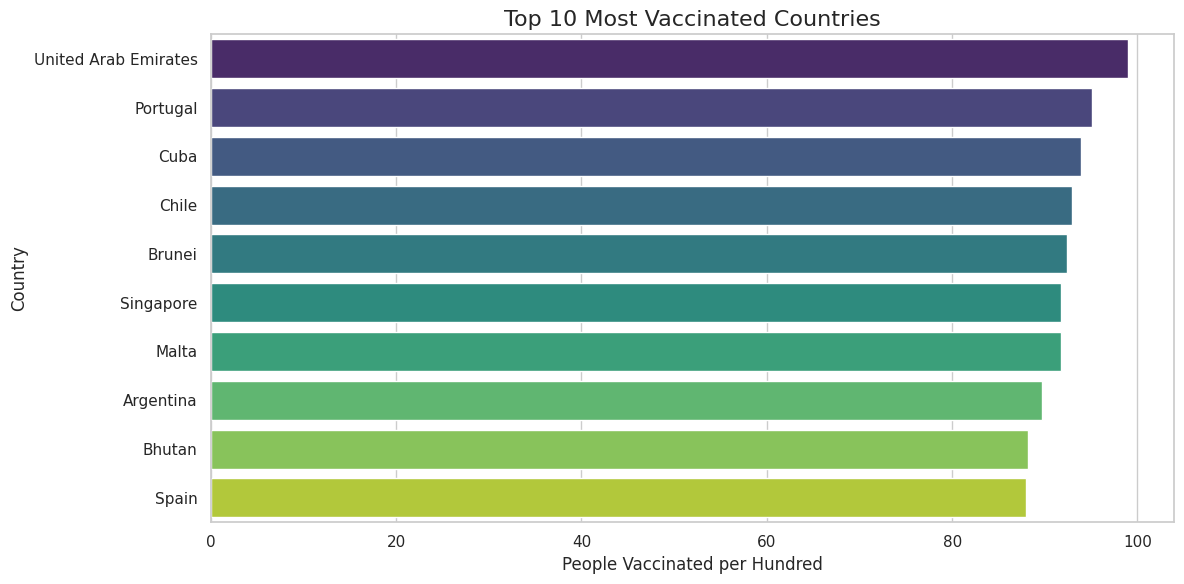

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10
top10 = top_vaccinated[['Country_Region', 'people_vaccinated_per_hundred']].head(10)

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.barplot(x='people_vaccinated_per_hundred', y='Country_Region', data=top10, palette='viridis')

# Titles and labels
plt.title('Top 10 Most Vaccinated Countries', fontsize=16)
plt.xlabel('People Vaccinated per Hundred')
plt.ylabel('Country')
plt.tight_layout()

# Show plot
plt.show()


/tmp/ipython-input-37-3093979409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='people_vaccinated_per_hundred', y='Country_Region', data=bottom10, palette='rocket')


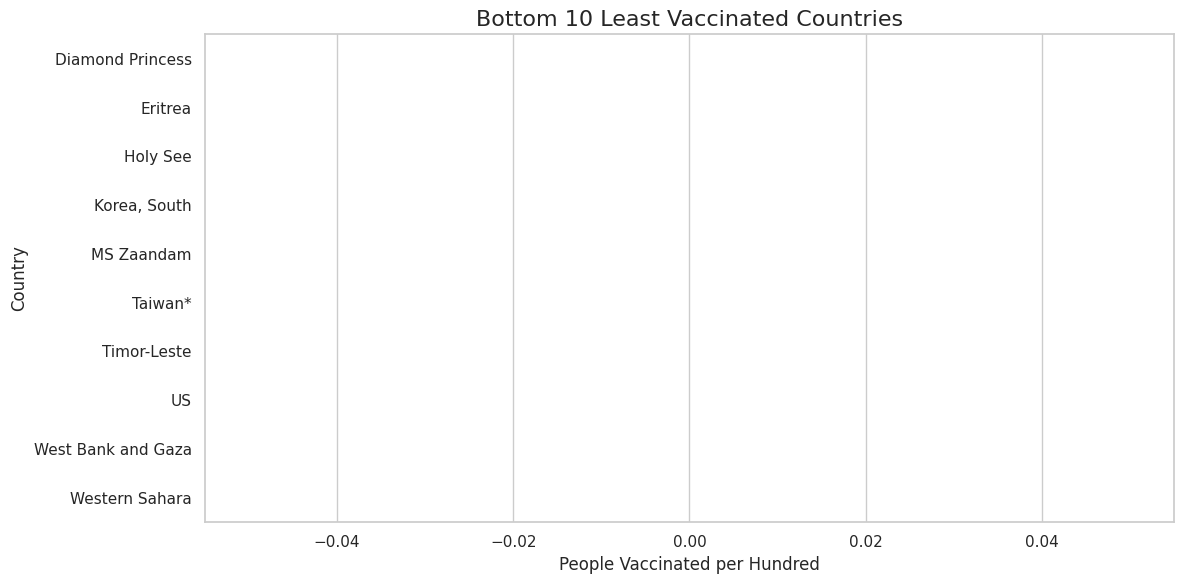

In [37]:
# Select bottom 10
bottom10 = top_vaccinated[['Country_Region', 'people_vaccinated_per_hundred']].tail(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='people_vaccinated_per_hundred', y='Country_Region', data=bottom10, palette='rocket')

# Titles and labels
plt.title('Bottom 10 Least Vaccinated Countries', fontsize=16)
plt.xlabel('People Vaccinated per Hundred')
plt.ylabel('Country')
plt.tight_layout()

# Show plot
plt.show()


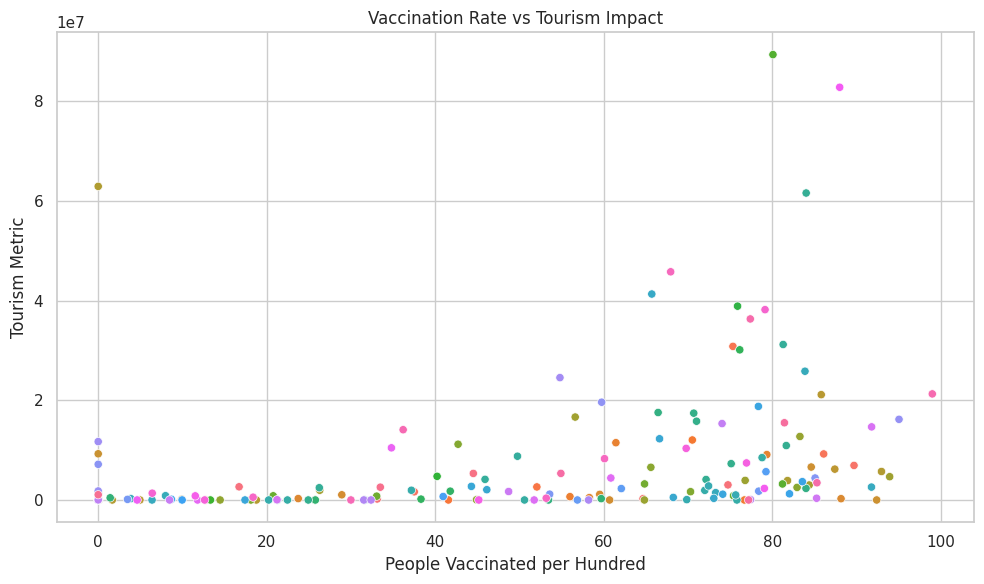

In [38]:
# Scatter plot: Vaccination rate vs Tourism
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df,
                x='people_vaccinated_per_hundred',
                y='Tourism',
                hue='Country_Region',
                legend=False)

plt.title('Vaccination Rate vs Tourism Impact')
plt.xlabel('People Vaccinated per Hundred')
plt.ylabel('Tourism Metric')
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# Correlation between vaccination and tourism
correlation = merged_df['people_vaccinated_per_hundred'].corr(merged_df['Tourism'])
print(f"📊 Correlation between Vaccination Rate and Tourism: {correlation:.2f}")


📊 Correlation between Vaccination Rate and Tourism: 0.31


In [40]:
# Top 10 countries by vaccination rate
top_vaccinated = merged_df.sort_values(by='people_vaccinated_per_hundred', ascending=False)
print("🌍 Top 10 Most Vaccinated Countries:")
print(top_vaccinated[['Country_Region', 'people_vaccinated_per_hundred']].head(10))

# Bottom 10 countries by tourism impact
least_tourism = merged_df.sort_values(by='Tourism', ascending=True)
print("\n🧳 Bottom 10 Countries by Tourism:")
print(least_tourism[['Country_Region', 'Tourism']].head(10))


🌍 Top 10 Most Vaccinated Countries:
           Country_Region  people_vaccinated_per_hundred
174  United Arab Emirates                          98.99
135              Portugal                          95.04
43                   Cuba                          93.93
35                  Chile                          92.96
24                 Brunei                          92.39
150             Singapore                          91.79
108                 Malta                          91.77
6               Argentina                          89.70
19                 Bhutan                          88.16
156                 Spain                          88.00

🧳 Bottom 10 Countries by Tourism:
   Country_Region  Tourism
0     Afghanistan    14000
11        Bahamas    14000
13     Bangladesh    14000
28        Burundi    14000
24         Brunei    14000
27          Burma    14000
31       Cameroon    14000
22       Botswana    14000
48       Djibouti    14000
55        Eritrea    14000


/tmp/ipython-input-41-1706584862.py:16: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


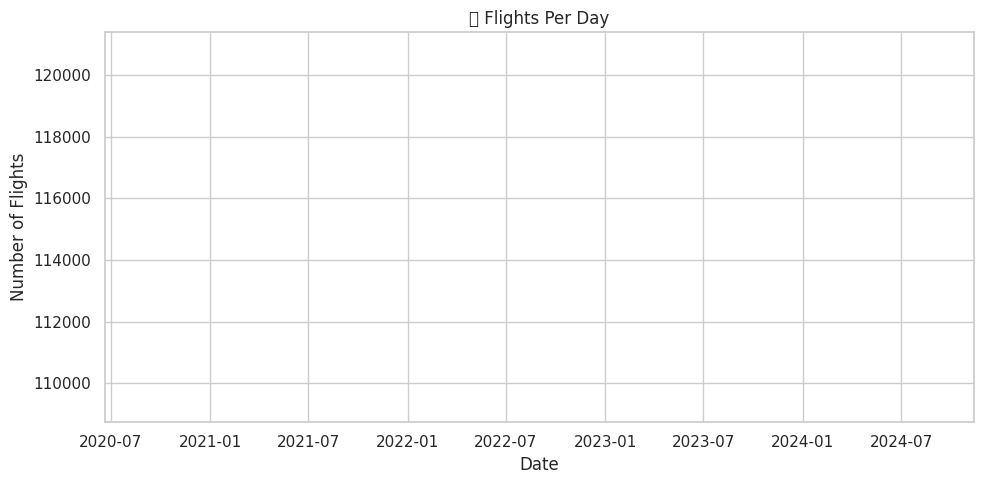

In [41]:
# Convert timestamps to datetime
flight_df['firstseen'] = pd.to_datetime(flight_df['firstseen'], unit='s')
flight_df['lastseen'] = pd.to_datetime(flight_df['lastseen'], unit='s')

# Extract flight date
flight_df['flight_date'] = flight_df['firstseen'].dt.date

# Flights per day
flights_per_day = flight_df.groupby('flight_date').size()

# Plot
flights_per_day.plot(kind='line', figsize=(10, 5), title='📅 Flights Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.tight_layout()
plt.show()


📈 Correlation Matrix:
                                 Tourism  people_vaccinated_per_hundred
Tourism                        1.000000                       0.311418
people_vaccinated_per_hundred  0.311418                       1.000000


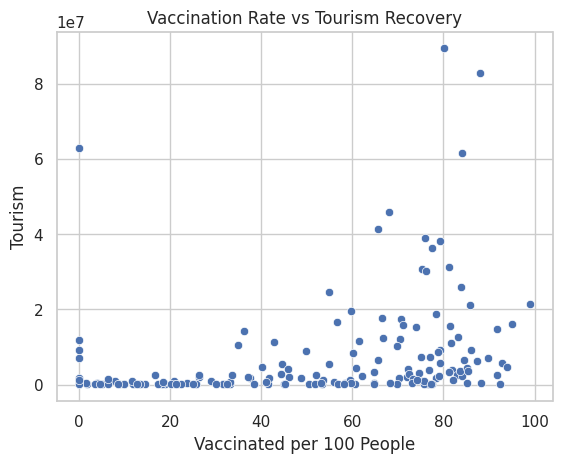

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Select numeric features
predict_df = merged_df[['Tourism', 'people_vaccinated_per_hundred']].dropna()

# Features and target
X = predict_df[['people_vaccinated_per_hundred']]
y = predict_df['Tourism']

# Check correlation
correlation = predict_df.corr()
print("📈 Correlation Matrix:\n", correlation)

# Visualize
sns.scatterplot(x='people_vaccinated_per_hundred', y='Tourism', data=predict_df)
plt.title('Vaccination Rate vs Tourism Recovery')
plt.xlabel('Vaccinated per 100 People')
plt.ylabel('Tourism')
plt.grid(True)
plt.show()


In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("🔍 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("🔍 R-squared Score:", r2_score(y_test, y_pred))


🔍 Mean Squared Error: 245630896219674.97
🔍 R-squared Score: 0.12742951468011632


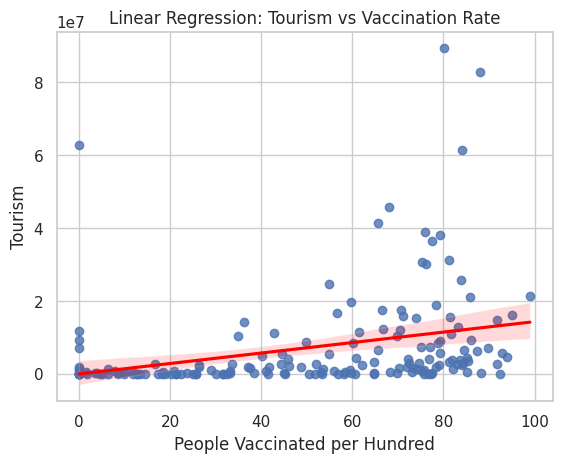

In [44]:
# Regression line plot
sns.regplot(x='people_vaccinated_per_hundred', y='Tourism', data=predict_df, line_kws={"color":"red"})
plt.title('Linear Regression: Tourism vs Vaccination Rate')
plt.xlabel('People Vaccinated per Hundred')
plt.ylabel('Tourism')
plt.grid(True)
plt.show()


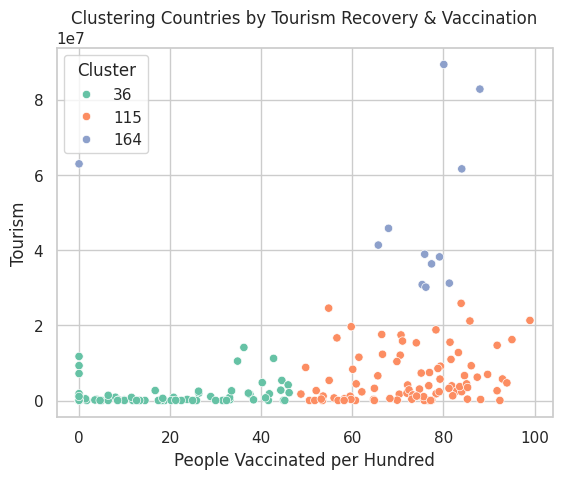

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data
cluster_df = merged_df[['Country_Region', 'Tourism', 'people_vaccinated_per_hundred']].dropna()

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df[['Tourism', 'people_vaccinated_per_hundred']])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Rename clusters by average tourism (for interpretation)
cluster_df['Cluster_Label'] = cluster_df.groupby('Cluster')['Tourism'].transform('mean')
cluster_df['Cluster'] = cluster_df['Cluster_Label'].rank().astype(int)  # 1=Low, 2=Mid, 3=High
cluster_df.drop(columns='Cluster_Label', inplace=True)

# Visualize clusters
sns.scatterplot(
    x='people_vaccinated_per_hundred',
    y='Tourism',
    hue='Cluster',
    palette='Set2',
    data=cluster_df
)
plt.title('Clustering Countries by Tourism Recovery & Vaccination')
plt.xlabel('People Vaccinated per Hundred')
plt.ylabel('Tourism')
plt.grid(True)
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE manually
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)




RMSE: 10768094.752605168


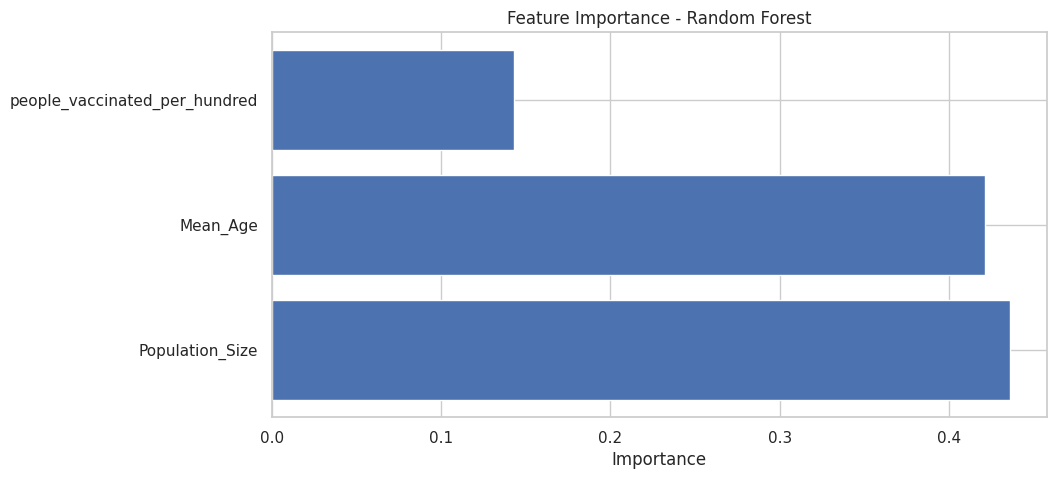

In [49]:
import matplotlib.pyplot as plt

# Feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


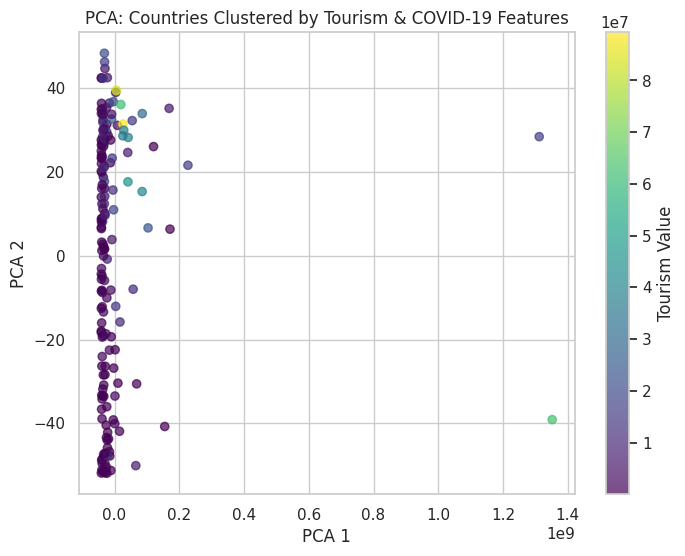

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA: Countries Clustered by Tourism & COVID-19 Features")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Tourism Value")
plt.show()


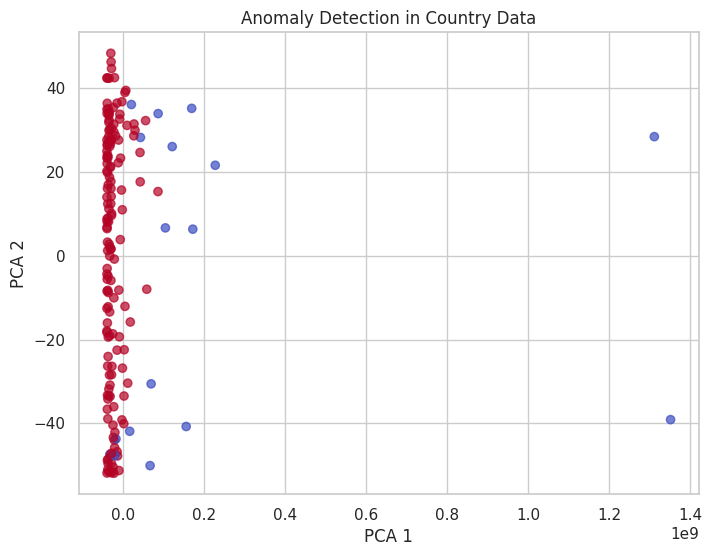

In [51]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers, cmap='coolwarm', alpha=0.7)
plt.title("Anomaly Detection in Country Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values in features or target
model_df = merged_df.dropna(subset=[
    'Tourism',
    'people_vaccinated_per_hundred',
    'Population_Size',
    'Mean_Age'
])

# Features and target
X = model_df[[
    'people_vaccinated_per_hundred',
    'Population_Size',
    'Mean_Age'
]]
y = model_df['Tourism']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


In [54]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


✅ RMSE: 10966158.58
✅ R² Score: 0.57


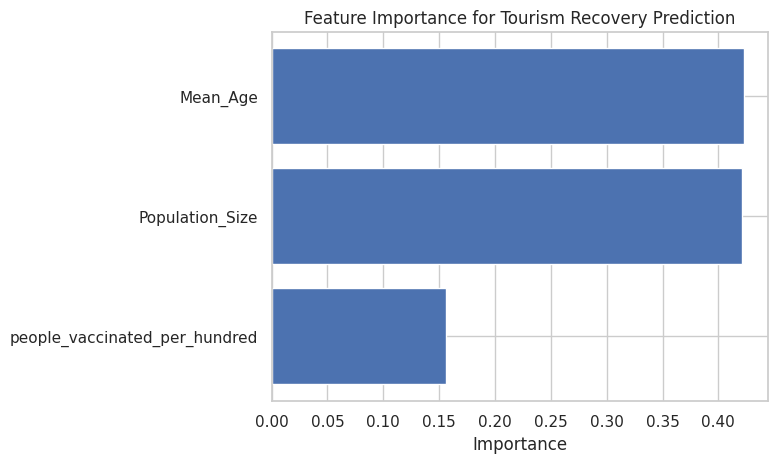

In [55]:
# Feature Importance
import matplotlib.pyplot as plt

plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance for Tourism Recovery Prediction")
plt.xlabel("Importance")
plt.show()


In [56]:
# 🔧 Step 1: Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ✅ Step 2: Prepare the dataset (drop missing)
model_df = merged_df.dropna(subset=[
    'Tourism',
    'people_vaccinated_per_hundred',
    'Population_Size',
    'Mean_Age'
])

# 🎯 Step 3: Define features and target
X = model_df[[
    'people_vaccinated_per_hundred',
    'Population_Size',
    'Mean_Age'
]]
y = model_df['Tourism']

# ✂️ Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ⚖️ Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌲 Step 6: Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 🔮 Step 7: Make predictions
y_pred = model.predict(X_test_scaled)

# 📊 Step 8: Evaluate model
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"✅ R² Score (Explained Variance): {r2:.2f}")


✅ RMSE (Root Mean Squared Error): 10966158.58
✅ R² Score (Explained Variance): 0.57


/tmp/ipython-input-57-1068343212.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


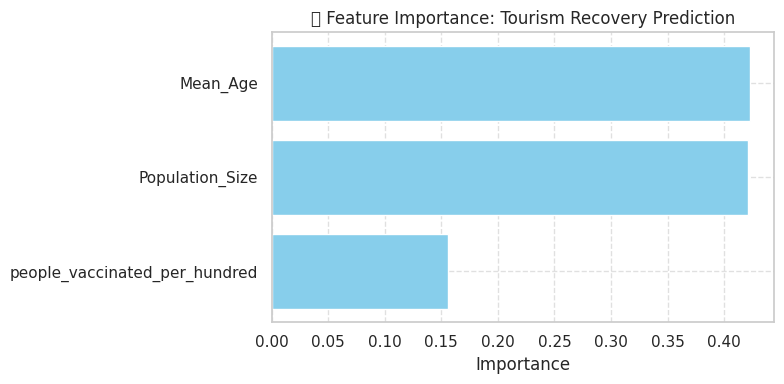

In [57]:
# 🔍 Feature Importance Plot
plt.figure(figsize=(8, 4))
plt.barh(X.columns, model.feature_importances_, color='skyblue')
plt.title("🔍 Feature Importance: Tourism Recovery Prediction")
plt.xlabel("Importance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-58-2845628142.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


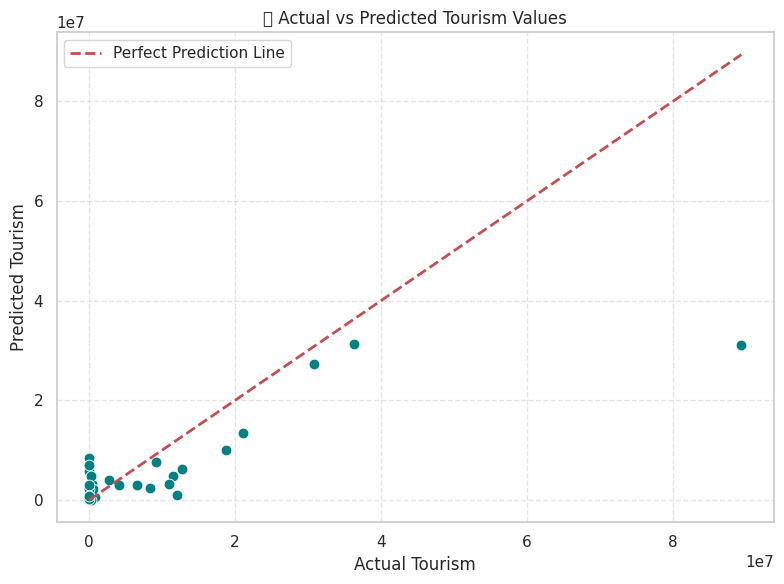

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual_Tourism': y_test,
    'Predicted_Tourism': y_pred
})

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=comparison_df, x='Actual_Tourism', y='Predicted_Tourism', color='teal', s=60)
plt.plot([comparison_df.min().min(), comparison_df.max().max()],
         [comparison_df.min().min(), comparison_df.max().max()],
         'r--', lw=2, label='Perfect Prediction Line')

plt.title('📈 Actual vs Predicted Tourism Values')
plt.xlabel('Actual Tourism')
plt.ylabel('Predicted Tourism')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
